# Linear Regression Project :- House Price Prediction

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [76]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Checking missing values of the data & data types 

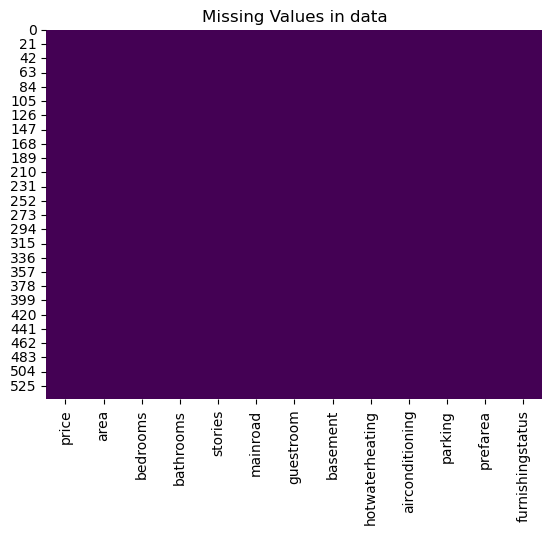

In [77]:
sns.heatmap(df.isnull(),cbar=False ,cmap= 'viridis')
plt.title('Missing Values in data')
plt.show()

This Heatmap indicates there is no missing values 

In [78]:
## Let us look at the Data Types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [79]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## EDA

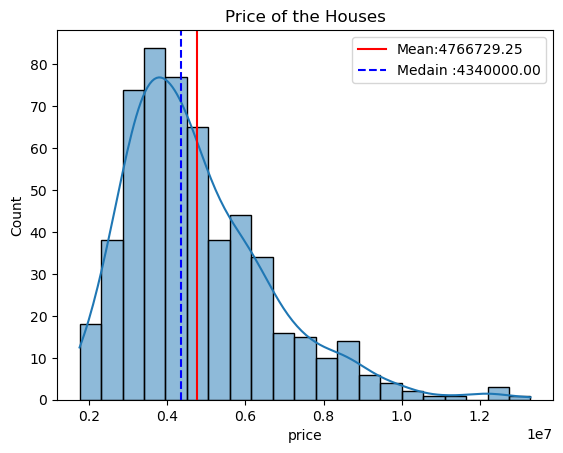

In [80]:
sns.histplot(x= 'price',data = df,kde=True)
mean_price = df['price'].mean()
median_price = df['price'].median()
plt.axvline(mean_price,color='red',linestyle='-',label = f"Mean:{mean_price:.2f}")
plt.axvline(median_price,color='blue',linestyle='--',label=f"Medain :{median_price:.2f}")
plt.title("Price of the Houses")
plt.legend()
plt.show()

* We can also see that the average value is slightly higher than expected compared to the median.
* The distribution is right-skewed

In [81]:
df['price'].skew()

np.float64(1.2122388370279802)

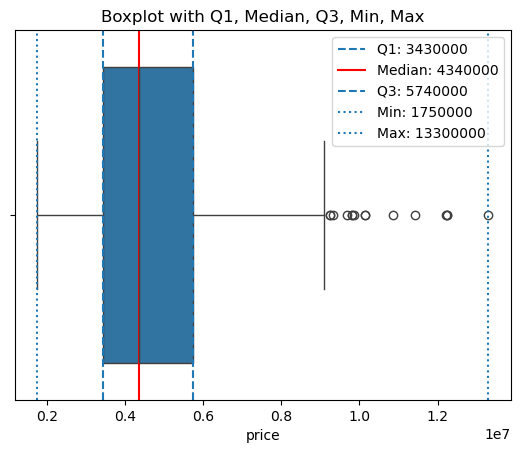

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x='price', data=df)

# Calculate statistics
q1 = df['price'].quantile(0.25)
median = df['price'].quantile(0.50)
q3 = df['price'].quantile(0.75)
min_val = df['price'].min()
max_val = df['price'].max()

# Draw lines
plt.axvline(q1, linestyle='--', label=f"Q1: {q1:.0f}")
plt.axvline(median, color='red', label=f"Median: {median:.0f}")
plt.axvline(q3, linestyle='--', label=f"Q3: {q3:.0f}")
plt.axvline(min_val, linestyle=':', label=f"Min: {min_val:.0f}")
plt.axvline(max_val, linestyle=':', label=f"Max: {max_val:.0f}")

plt.title("Boxplot with Q1, Median, Q3, Min, Max")
plt.legend()
plt.show()


In [84]:
price_log = np.log(df['price'])

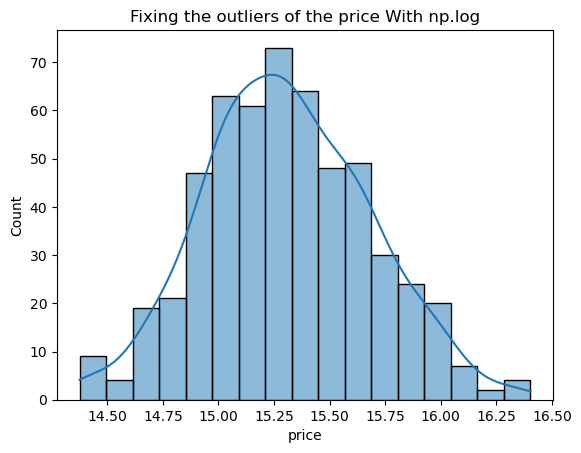

In [86]:
sns.histplot(price_log, kde=True)
plt.title('Fixing the outliers of the price With np.log')
plt.show()

Here we actually able to the reducing of the ouliers of the price_log 

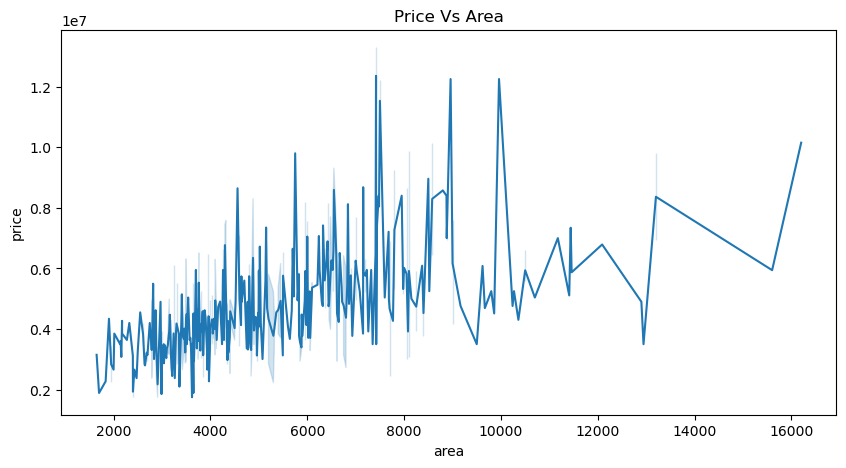

In [87]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df , x = 'area',y = 'price')
plt.title('Price Vs Area')
plt.show()

## There is a positive relationship between house area and price — as the area increases, the price generally tends to increase.

In [88]:
df[['area','price']].corr()

,area,price
area,1.000000,0.535997
price,0.535997,1.000000


# Plots

In [89]:
cols_num=['bedrooms', 'bathrooms', 'stories', 'parking']

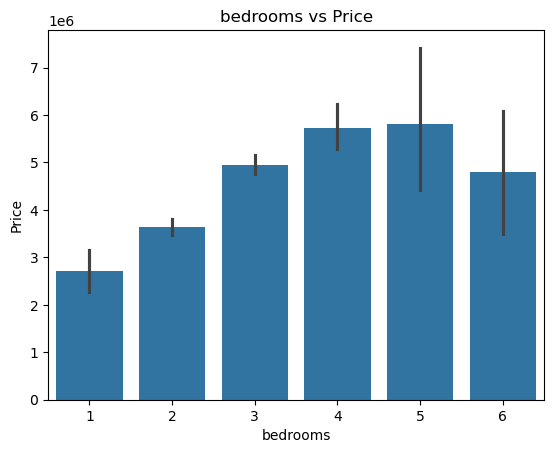

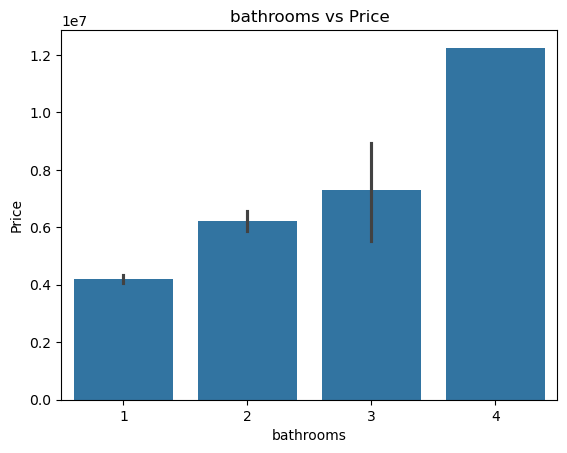

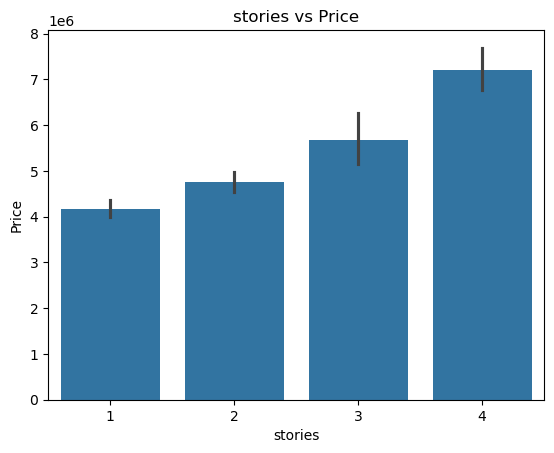

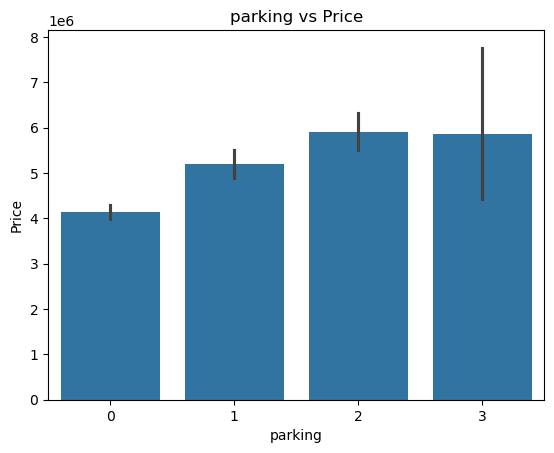

In [90]:

for cols in cols_num:
    sns.barplot(data=df,x = cols , y = 'price')
    plt.title(f"{cols} vs Price")
    plt.xlabel(cols)
    plt.ylabel("Price")
    plt.show()

## With the numerical we can see the price is increasing based on the Requirement of the customer

* Basically we can see the num of stories increase the house price also started raising
* The house With 4 bathroom is more costly 
* The house with parking count of  3 & 4 the price slightly equally distributed
* The house with 3, 4 & 5 bedroom is costly then the 6 bedroom house 

In [102]:
corr = df.corr(numeric_only=True)['price'].sort_values(ascending= False)
corr

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64

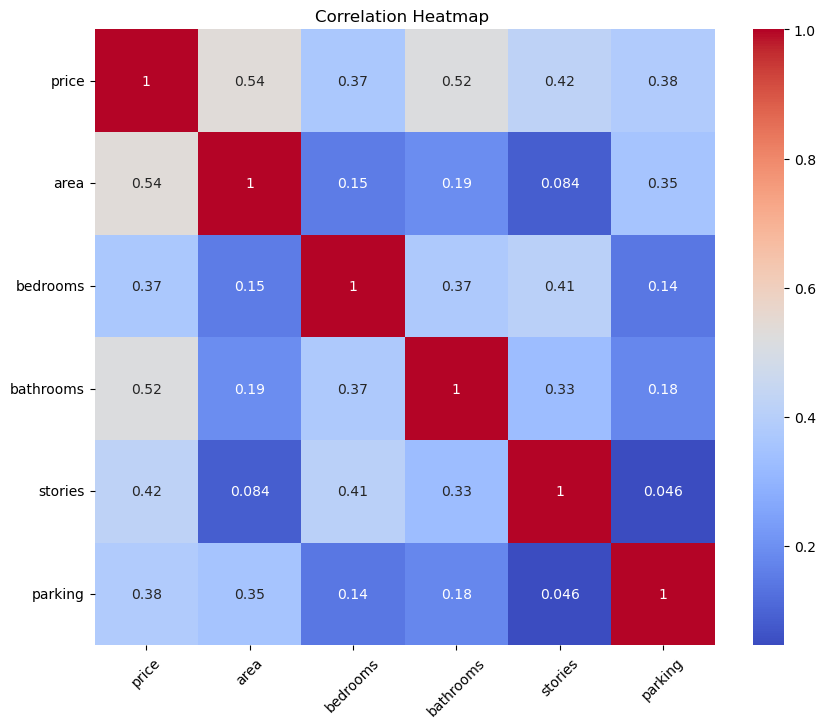

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot= True , cmap='coolwarm')
plt.title('Correlation Heatmap ')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.show()

## Categorical Columns

In [107]:
cat_col = df.select_dtypes(include=['object']).columns

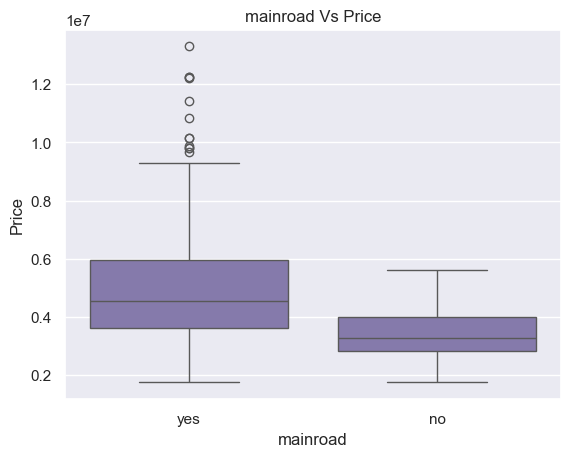

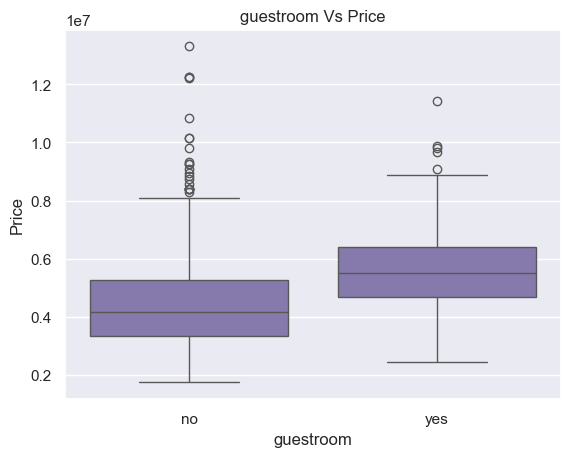

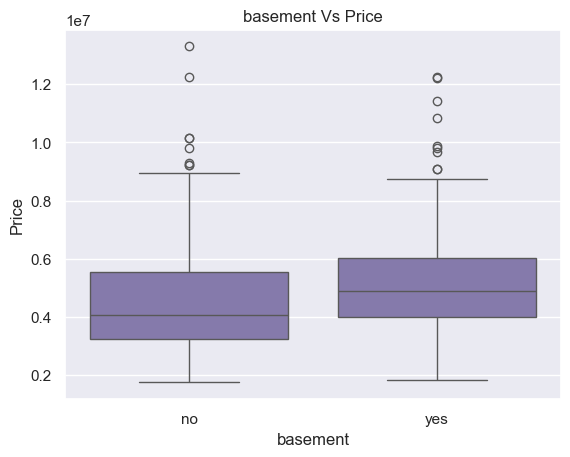

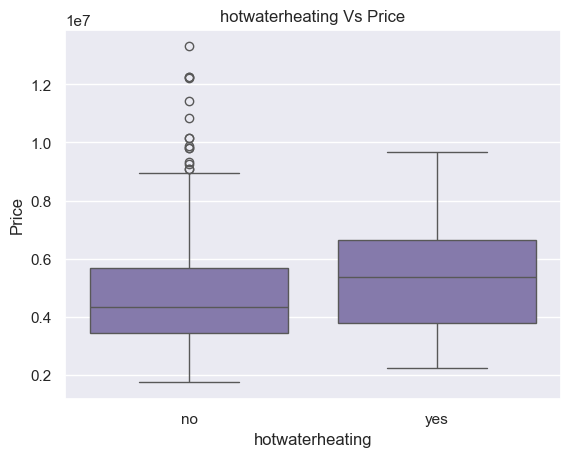

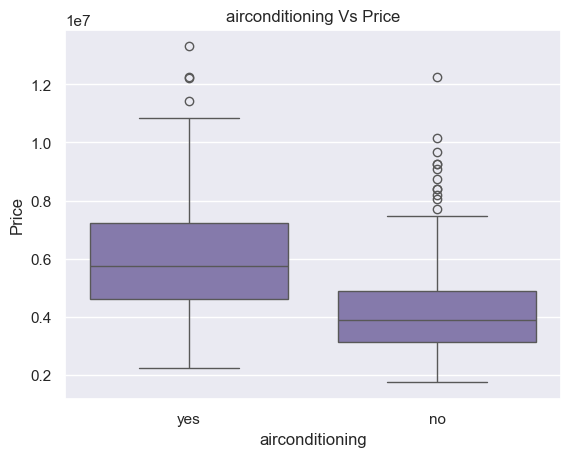

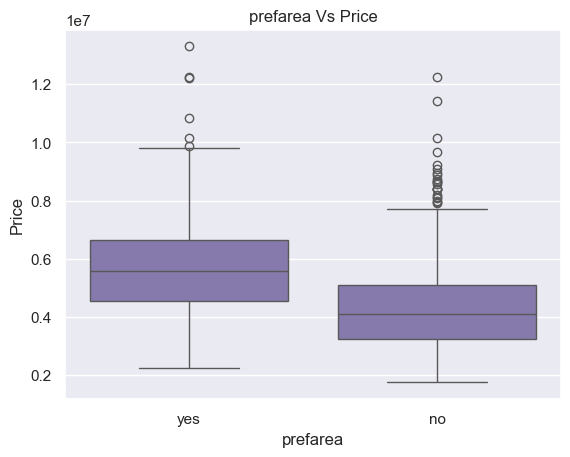

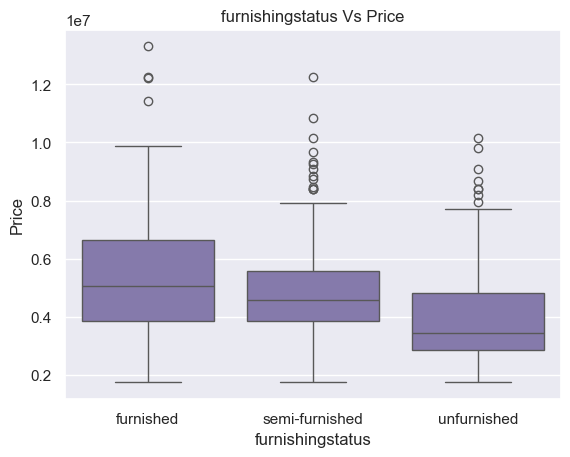

In [116]:

for col in cat_col:
    sns.set_theme(style='darkgrid')
    sns.boxplot(data=df,x=col ,y='price', color ='m')
    plt.title(f"{col} Vs Price")
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

## Model building

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder ,  StandardScaler

In [119]:
x = df.drop(columns='price',axis=1)
y= df['price']

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# One hot Encoding

In [122]:
X = pd.get_dummies(data=x,drop_first=True,dtype=int)

In [128]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [130]:
X

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [135]:
lr_model = LinearRegression()

In [136]:
lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [143]:
y_pred = lr_model.predict(X_test)

In [144]:
lr_model.coef_ ,lr_model.intercept_

(array([ 511615.56377666,   56615.57245779,  549420.50124098,
         353158.42985604,  193542.78167455,  128151.92129533,
          88590.21346152,  186194.15050566,  143233.20624958,
         367817.89491558,  267018.66081239,  -62550.29721128,
        -193987.7810882 ]),
 np.float64(4737518.175380117))

In [145]:
from sklearn.metrics import mean_squared_error ,r2_score , mean_absolute_error

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.6529242642153177
1754318687330.6675
970043.403920164


In [149]:
pd.to_pickle(lr_model, "lr_model.pkl")